In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir="/content/drive/MyDrive/ML_Project/ML_DF.csv"
ML= pd.read_csv(data_dir)
ML

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_price,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,high,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,high,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,medium,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,637.0,31,23


In [ ]:
# Split the data into training and testing sets
X = ML.drop(['trip_price'], axis=1)
y = ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

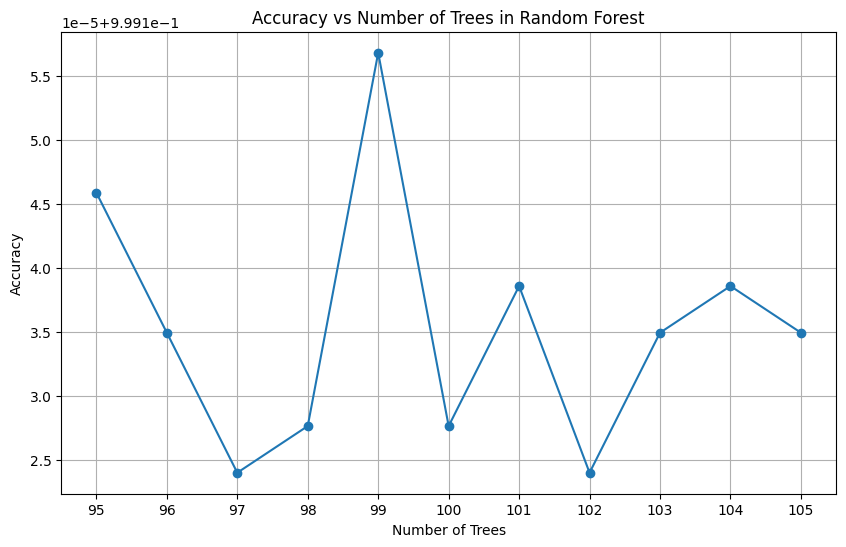

Number of Trees with Max Accuracy: 99
Max Accuracy: 0.9992


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split the data into training and testing sets
#Split data to input and output
X = ML.drop(['trip_price'], axis=1)
y = ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=0.3, random_state=42)

# Initialize lists to store accuracies and number of trees
# first trial for number of trees range
num_trees_range = range(95, 106)
accuracies = []

# Try different numbers of trees and calculate accuracy for each
for num_trees in num_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy versus number of trees
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(num_trees_range)
plt.grid(True)
plt.show()

# Find the number of trees with maximum accuracy
max_accuracy_index = np.argmax(accuracies)
max_accuracy_trees = num_trees_range[max_accuracy_index]
max_accuracy = accuracies[max_accuracy_index]
print(f"Number of Trees with Max Accuracy: {max_accuracy_trees}")
print(f"Max Accuracy: {max_accuracy:.4f}")


very low accurancy, overfitted, and computationally intensive retry with fewer number of trees

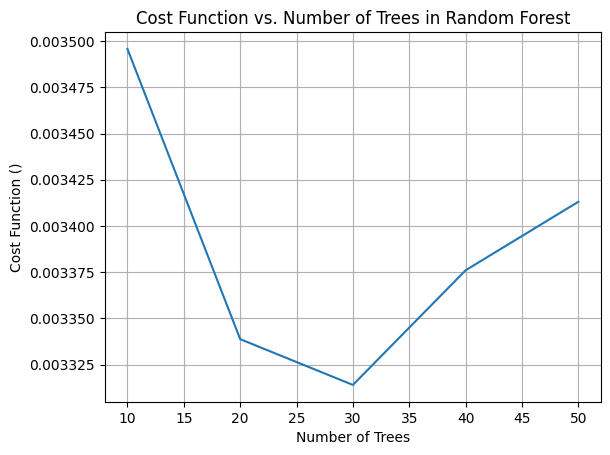

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss


# Split the data into training and testing sets
X=ML.drop(['trip_price'],axis=1)
y=ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=0.3, random_state=42)

# Initialize lists to store accuracies and number of trees
num_trees_range = range(10, 60,10)
cost_values = []

# Try different numbers of trees and calculate accuracy for each
for num_trees in num_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    cost_values.append(loss)


# Plotting cost function vs. tree depth
plt.plot(num_trees_range, cost_values)
plt.xlabel('Number of Trees')
plt.ylabel('Cost Function ()')
plt.title('Cost Function vs. Number of Trees in Random Forest')
plt.grid(True)
plt.show()


graph shows very small training error (overfitted) even for 10 tree so try again with fewer range

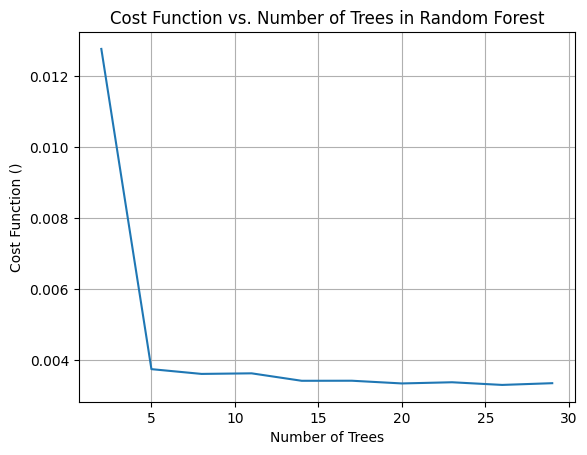

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss


# Split the data into training and testing sets
X=ML.drop(['trip_price'],axis=1)
y=ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=0.3, random_state=42)

# Initialize lists to store accuracies and number of trees
num_trees_range = range(2, 30,3)
cost_values = []

# Try different numbers of trees and calculate accuracy for each
for num_trees in num_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    cost_values.append(loss)


# Plotting cost function vs. tree depth
plt.plot(num_trees_range, cost_values)
plt.xlabel('Number of Trees')
plt.ylabel('Cost Function ()')
plt.title('Cost Function vs. Number of Trees in Random Forest')
plt.grid(True)
plt.show()


the graph shows error elbow at 5 trees, so 5 would minimize error and prevent overfitting

Accuracy: 0.9998
Confusion Matrix for 5 Trees:
[[ 64782     10     21]
 [    17  10364      0]
 [    12      0 198760]]


<Figure size 640x480 with 0 Axes>

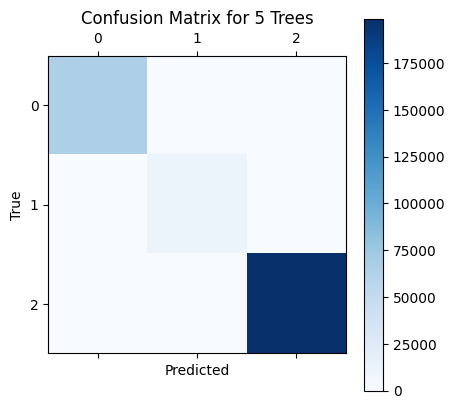

Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00     64813
         low       1.00      1.00      1.00     10381
      medium       1.00      1.00      1.00    198772

    accuracy                           1.00    273966
   macro avg       1.00      1.00      1.00    273966
weighted avg       1.00      1.00      1.00    273966



In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error , classification_report
from sklearn.preprocessing import LabelEncoder
#running the model with 5 trees

rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42)
rf_classifier.fit(X_test, y_test)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Calculate OOB accuracy for classification
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for 5 Trees:")
print(cm)
plt.figure()
plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for 5 Trees')
plt.show()
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9998